In [15]:
import numpy as np
import matplotlib.pyplot as plt


In [16]:
#Create a function for Data Generation
def generate_data(m):
    X = np.random.randn(m) * 10  # Data is between -10 and 10
    noise = np.random.randn(m)
    Y = 3*X + 1 + noise*10
    return X, Y

def normalize_data(X):
    return (X - np.mean(X)) / np.std(X)

def testTrainSplit(X,Y,split=0.8):
    m = X.shape[0]
    data = np.zeros((m, 2))  #data is matrix contain two columns filled with zeroes
    data[:,0] = X
    data[:,1] = Y
    np.random.shuffle(data)
    train_size = int(m * split)
    X_train = data[:train_size, 0]
    Y_train = data[:train_size, 1]
    X_test = data[train_size:, 0]
    Y_test = data[train_size:, 1]
    return (X_train, Y_train), (X_test, Y_test)

In [17]:

X, Y = generate_data(100)
X = normalize_data(X)
Y = normalize_data(Y)

(X_train, Y_train), (X_test, Y_test) = testTrainSplit(X, Y)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(80,) (80,)
(20,) (20,)


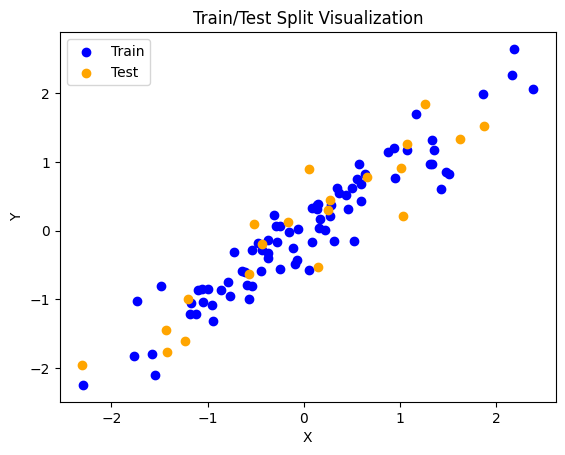

In [18]:
plt.scatter(X_train, Y_train, color='blue', label='Train')
plt.scatter(X_test, Y_test, color='orange', label='Test')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Train/Test Split Visualization')
plt.legend()
plt.show()

In [19]:
#Hypothesis
def hypothesis(X, theta):
    return theta[0] + theta[1] * X

def error(X, Y, theta):
    m = X.shape[0]
    e = 0
    for i in range(m):
        y_hat = hypothesis(X[i], theta)
        e += (Y[i] - y_hat) ** 2
    return e / (2*m)

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    
    
    for i in range(m):
        exp = hypothesis(X[i],theta) - Y[i]
        grad[0] += exp
        grad[1] += exp * X[i]

    return grad/m

def train(X,Y,learning_rate=0.1):
    theta = np.zeros((2,))
    max_itr = 100
    error_list = []
    for i in range(max_itr):
        grad = gradient(X,Y,theta)
        error_list.append(error(X,Y,theta))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]
    plt.plot(error_list)
    return theta


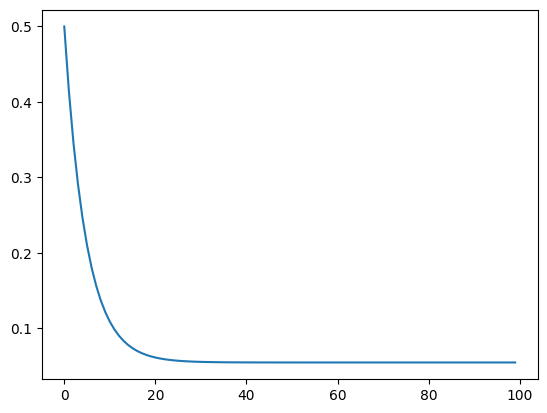

In [20]:
theta = train(X,Y)

In [21]:
def predict(X, theta):
    return hypothesis(X, theta)

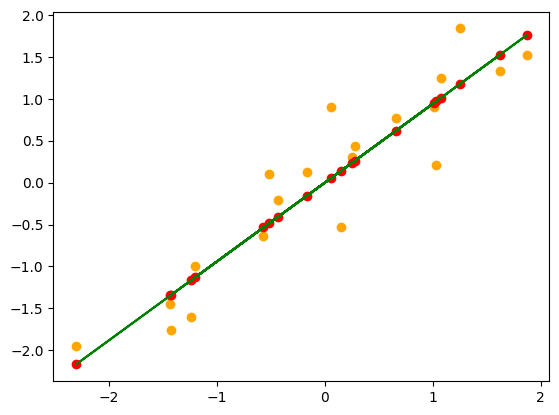

In [22]:
y_predict = predict(X_test, theta)
plt.scatter(X_test, Y_test, color='orange', label='Test')
plt.scatter(X_test, y_predict, color='red', label='Predicted')
plt.plot(X_test, y_predict, color='green', label='Regression Line')
plt.show()

![alt text](image.png)

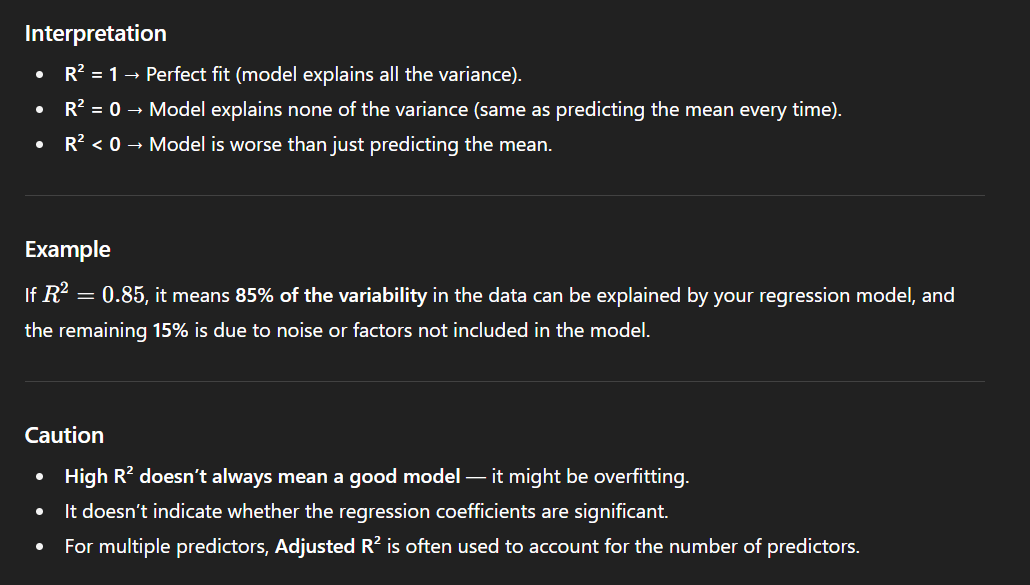

In [23]:
#Model Evaluation

def r2score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)


In [24]:
r2score(Y_test, y_predict)

np.float64(0.8668193409106433)